In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix


#importing libraries 

reading dataset and printing top 5 values.

In [53]:
DF = pd.read_csv('Bank Customer Churn Prediction.csv')

data = DF
data.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


gives the datatypes and no of values present 

In [54]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


returns the sum of all outliers or null values present

In [55]:
DF.nunique()
DF.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [56]:
DF.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [57]:
for c in DF.columns:
    
    print("Feature name: {}".format(c))
    print("Unique values:\n")
    print(DF[c].unique())
    print("\n--------------------------------------------------\n")

Feature name: customer_id
Unique values:

[15634602 15647311 15619304 ... 15584532 15682355 15628319]

--------------------------------------------------

Feature name: credit_score
Unique values:

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799

objects r those whose datatype is string 
numericals with datatypes float and int

In [58]:
objects = DF.select_dtypes(include=[object])

objects
numericals = DF.select_dtypes(exclude=[object])
numericals

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


from the above divide the dataset into numerical and string values

In [59]:
categoricals = ['country','gender']

numericals= ['credit_score','age','products_number','tenure','balance','estimated_salary','credit_card','active_member','churn']

In [60]:
DF[numericals].describe()

,credit_score,age,products_number,tenure,balance,estimated_salary,credit_card,active_member,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,1.530200,5.012800,76485.889288,100090.239881,0.70550,0.515100,0.203700
std,96.653299,10.487806,0.581654,2.892174,62397.405202,57510.492818,0.45584,0.499797,0.402769
min,350.000000,18.000000,1.000000,0.000000,0.000000,11.580000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,1.000000,3.000000,0.000000,51002.110000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,1.000000,5.000000,97198.540000,100193.915000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,2.000000,7.000000,127644.240000,149388.247500,1.00000,1.000000,0.000000
max,850.000000,92.000000,4.000000,10.000000,250898.090000,199992.480000,1.00000,1.000000,1.000000


In [61]:
DF[categoricals].describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


counts the unique value in each column

In [62]:
for col in objects:
  print(f"Value counts of {col} column")
  print(DF[col].value_counts(), '\n')

Value counts of country column
France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64 

Value counts of gender column
Male      5457
Female    4543
Name: gender, dtype: int64 



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data visualization
and comparision btw unique values in features.

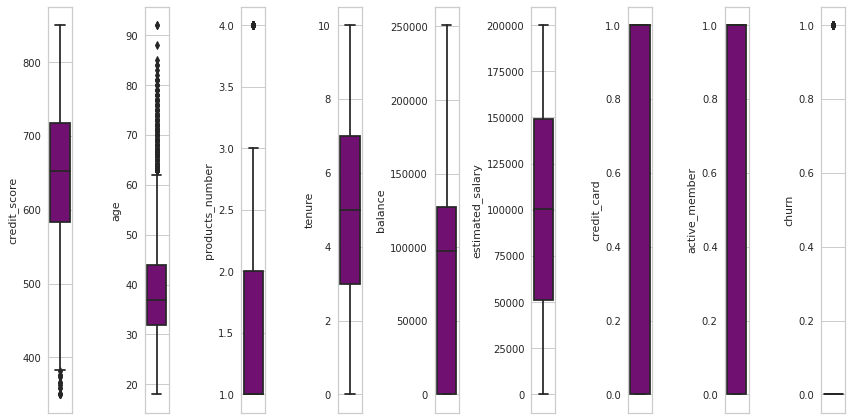

In [64]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=DF[features[i]], color='purple')
    plt.tight_layout()

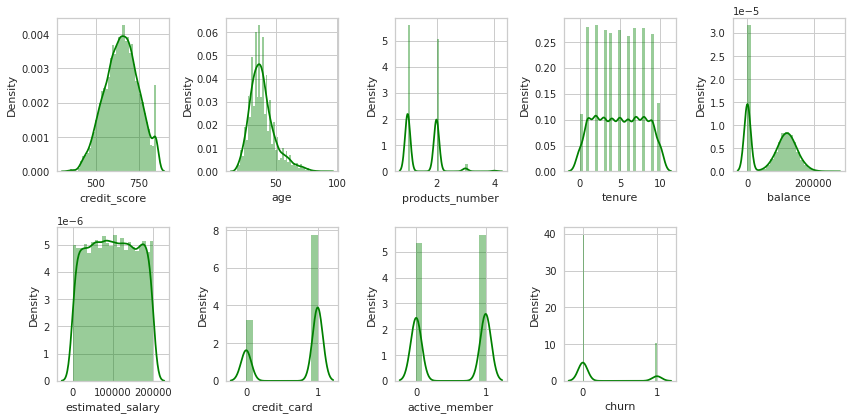

In [65]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=DF[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

<AxesSubplot:>

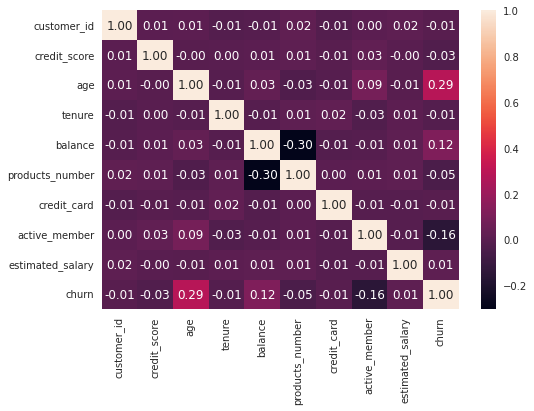

In [66]:
correlation = DF.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

it considers unique values of each cloumn and compares them with each other and churn rate

<AxesSubplot:xlabel='churn', ylabel='count'>

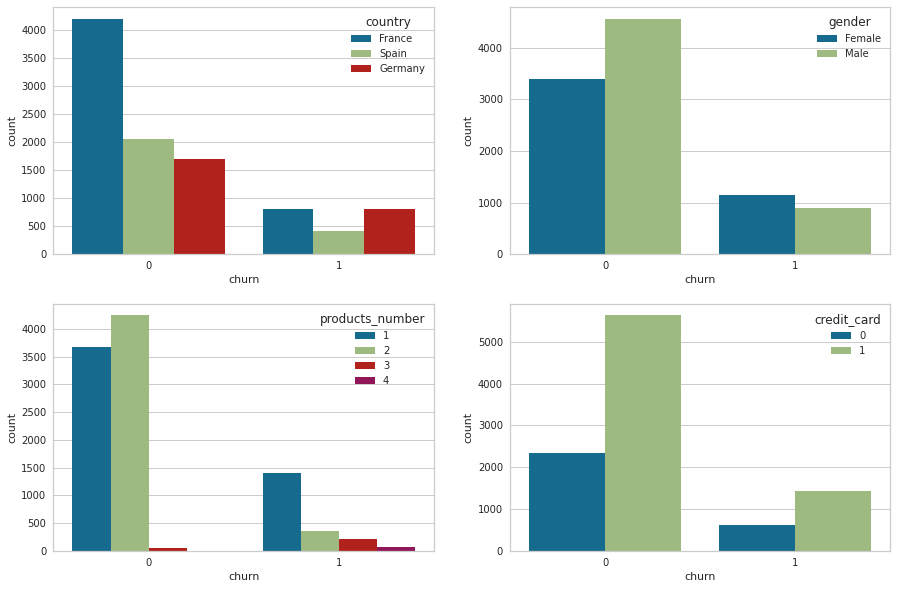

In [67]:
# understand categorical feature
_,axss = plt.subplots(2,2, figsize=[15,10])
sns.countplot(x='churn', hue='country', data=DF, ax=axss[0][0])
sns.countplot(x='churn', hue='gender', data=DF, ax=axss[0][1])
sns.countplot(x='churn', hue='products_number', data=DF, ax=axss[1][0])
sns.countplot(x='churn', hue='credit_card', data=DF, ax=axss[1][1])

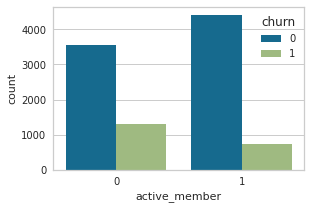

In [68]:
fig,axs=plt.subplots(figsize=(4.5,3))
sns.countplot(x='active_member',hue='churn',data=DF)
plt.show()

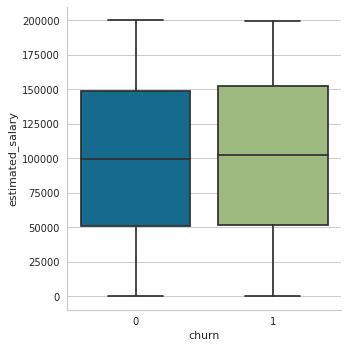

In [69]:
sns.catplot(x = 'churn', y="estimated_salary", kind="box", data = DF)

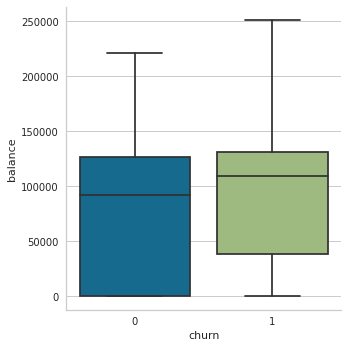

In [70]:
sns.catplot(x = 'churn', y="balance", kind="box", data = DF)

In [71]:
DF.groupby(['products_number']).agg(
    Churn = ('churn','count')
)

,Churn
products_number,
1,5084
2,4590
3,266
4,60


In [72]:
DF.groupby(['country']).agg(
    Churn = ('churn','count')
)

,Churn
country,
France,5014
Germany,2509
Spain,2477


In [73]:
cat_cols = DF.columns[DF.dtypes == 'O']
num_cols = DF.columns[(DF.dtypes == 'float64') | (DF.dtypes == 'int64')]

In [74]:
num_cols

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [75]:
cat_cols

Index(['country', 'gender'], dtype='object')

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [78]:
DF.drop(['estimated_salary'],axis = 1,inplace=True)
DF.drop(['customer_id'],axis = 1,inplace=True)
'''DF.drop(['balance'],axis = 1,inplace=True)
DF'''

"DF.drop(['balance'],axis = 1,inplace=True)\nDF"

In [79]:
DF['gender'] = DF['gender'].map({'Male':1, 'Female':0})
DF['country'] =  DF['country'].map({'Germany':0, 'France':1,'Spain':2})


In [80]:
X = DF.iloc[:, 0:9].values
y = DF.iloc[:, 9].values
X.shape
X



array([[619.,   1.,   0., ...,   1.,   1.,   1.],
       [608.,   2.,   0., ...,   1.,   0.,   1.],
       [502.,   1.,   0., ...,   3.,   1.,   0.],
       ...,
       [709.,   1.,   0., ...,   1.,   0.,   1.],
       [772.,   0.,   1., ...,   2.,   1.,   0.],
       [792.,   1.,   0., ...,   1.,   1.,   0.]])

countplot() method is used to Show the counts of observations in each categorical bin using bars.

In [81]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)


#individual trasformations for each particular columns

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()
X[:,1] = label_encoder_country.fit_transform(X[:,1])
X[:,2] = label_encoder_gender.fit_transform(X[:,2])

fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to both calculate and do transformation.

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)


minmaxscaler:Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [84]:
from sklearn.preprocessing import MinMaxScaler
obj_norm = MinMaxScaler().fit(X)
X_normalization = obj_norm.transform(X)
X_normalization[0]

array([0.538     , 0.5       , 0.        , 0.32432432, 0.2       ,
       0.        , 0.        , 1.        , 1.        ])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)
X_train.shape, y_train.shape
y_test.shape

(4778,)

In [86]:
X_test.shape, y_test.shape

((4778, 9), (4778,))

You can use the k-nearest neighbor algorithm for both classification and regression. Also, KNN can be used for both supervised and unsupervised learning.

The method used in KNN is fairly simple. Suppose that we have a dataset containing N examples. Now, in KNN, there is no learning technique. When we implement KNN on the N samples, it simply remembers the data points.

To remember all the data points, KNN stores all the data in memory. This can prove to be a problem for larger datasets.

After storing all the data into memory, suppose we give the k-nearest neighbor algorithm a new data to classify. As it has all the training data in memory, it will simply compare the new data with k of its nearest data points. And that’s the reason it is called the k-nearest neighbor technique.

By now, you must have guessed that larger datasets can be very costly when trying to implement the nearest neighbor algorithm.we also call KNN a non-parametric algorithm. This means that it does not make any assumptions about the training data. For this reason, KNN works well for classification problems.

basic format of importing knn:
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

info:


In KNN, we have three major such implementations for storing all of the data. They are:

Brute force approach: This is the most basic approach. Using brute force involves computing distances between all pairs of data points in the dataset. Suppose we have N samples with D dimensions. The search complexity is O[DN2]. For this reason, the brute force approach works well for small datasets. But for large datasets, the search time can be a lot more.

K-D tree: KD tree is a tree-based data structure that helps overcome the computational cost of the brute force approach.

KD tree greatly helps in reducing the number of distance calculations. The nearest neighbor search complexity for KD tree is O[DNlog(N)]. This is much less than the brute force approach when we consider larger datasets. KD tree stands for K-Dimensional tree. So, the KD tree can become inefficient as well when the number of dimensions D becomes very large.

Ball Tree: Ball tree helps to overcome the inefficiencies of the KD tree for higher dimensions. Ball tree is much faster for storing multidimensional data. Ball tree partitions data in nested hyperspheres called balls. In ball tree, each node contains a hypersphere. And each hypersphere contains a subset of points which are needed to be searched.


USUALLY P =1 FOR MANHANTAN
P=2 FOR EUCLIDIAN METRIC

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski', p = 2)

instead of considering 1 particular value for neighbours we r considdering a range of neighbours to determine best model

In [88]:
k_list = list(range(1,31))

In [89]:
k_values = dict(n_neighbors = k_list)

param_grid: dictionary that contains all of the parameters to try. scoring: evaluation metric to use when ranking results. cv: cross-validation, the number of cv folds for each combination of parameters

#

In [90]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)
grid.best_params_,grid.best_score_

({'n_neighbors': 1}, 0.8900253285774353)

In [91]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
knn2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn2.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
pred_prob = knn.predict_proba(X_train)
print(pred_prob)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [94]:
pred_prob = knn2.predict_proba(X_train)
print(pred_prob)

[[0.4 0.6]
 [1.  0. ]
 [0.  1. ]
 ...
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]]


#for prediction of churn values with respect to the test values.

In [95]:
X_test

array([[0.634     , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.684     , 0.5       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.626     , 0.        , 1.        , ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.6       , 1.        , 1.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.6       , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.35      , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [96]:
pred=knn.predict(X_test)
pred

array([1, 1, 1, ..., 1, 0, 0])

In [97]:
predicted_churn2 = knn2.predict(X_test)
predicted_churn2

array([1, 1, 1, ..., 1, 1, 1])

In [98]:
for i in pred:
    
    if pred[i] != predicted_churn2[i]:
        print(i)


ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7f30eb89f850>,
                estimator=KNeighborsClassifier(n_neighbors=1))

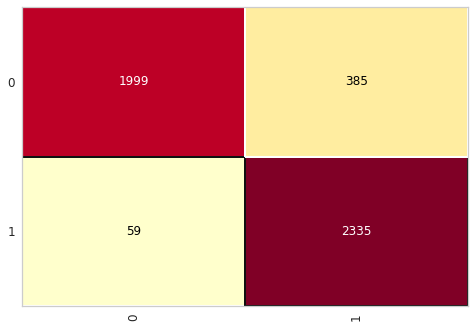

In [99]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm

ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7f30eb8f19d0>,
                estimator=KNeighborsClassifier())

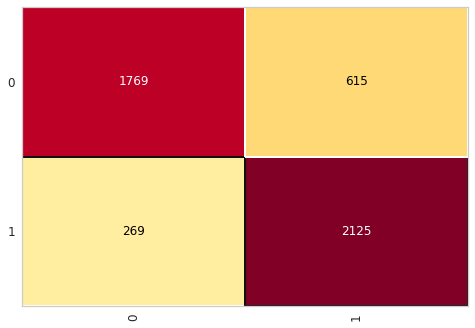

In [100]:
cm2 = ConfusionMatrix(knn2)
cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2

In [105]:
classification_knn = (classification_report(y_test, pred))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2384
           1       0.86      0.98      0.91      2394

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



In [106]:
classification_knn2 = (classification_report(y_test, predicted_churn2))
print(classification_knn2)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2384
           1       0.78      0.89      0.83      2394

    accuracy                           0.81      4778
   macro avg       0.82      0.81      0.81      4778
weighted avg       0.82      0.81      0.81      4778



AS WE R INCREASING THE NEIGHBOUR VALUE THE ACCURACY IS CLEARLY DECREASING.SO ACCORDINLY WE R ONLY CONSIDERING THE NEIGHBOURING VALUE AS 1